## Seeding Date detection using the Township level thesholds

#### Get the township level thresholds of the climate data 

In [1]:
import pandas as pd

##### Get the actual seeding dates of the quater section levels

In [28]:
df_climate_altered =pd.read_parquet('/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/input/V_4.0/climate_data_1987_2024_apr_oct_townships.parquet')
df_climate_altered


,Township,Date,GDD,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,SoilType,Year,Cumulative_GDD
0,1-1-E1,1987-04-01,0.000000,-1.272552,-1.172211,-1.207642,-0.684418,-0.658295,-0.672455,Moist Black,1987,0.000000
1,1-1-E1,1987-04-02,0.000000,-1.349457,-1.167816,-1.263977,-0.715179,-0.684906,-0.698578,Moist Black,1987,0.000000
2,1-1-E1,1987-04-03,0.000000,-1.357513,-1.247162,-1.298187,-0.743988,-0.716644,-0.729431,Moist Black,1987,0.000000
3,1-1-E1,1987-04-04,2.092224,-1.267914,-1.041107,-1.188080,-0.760345,-0.746918,-0.754333,Moist Black,1987,2.092224
4,1-1-E1,1987-04-05,4.157913,-1.002533,0.300446,-0.692078,-0.760101,-0.726898,-0.750580,Moist Black,1987,6.250137
...,...,...,...,...,...,...,...,...,...,...,...,...
61128239,S-L-WS,2024-10-27,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
61128240,S-L-WS,2024-10-28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
61128241,S-L-WS,2024-10-29,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
61128242,S-L-WS,2024-10-30,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439


In [29]:
df_10_actual_test = pd.read_csv('/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/input/V_4.0/actual_seeding_dates_10locations_2024.csv')

In [30]:
df_30_actual_test = pd.read_csv('/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/input/V_4.0/actual_seeding_dates_30locations_2024.csv')

##### Groupby soil type and get the min, max and average of the accumulated GDD and the min, mean, max soil temp layer 1 and layer 2

In [31]:
import numpy as np
import pandas as pd

df = df_30_actual_test.copy()

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Columns you intend to aggregate
agg_columns = [
    'Soil_temp_l1_min', 'Soil_temp_l1_max', 'Soil_temp_l1_mean',
    'Soil_temp_l2_min', 'Soil_temp_l2_max', 'Soil_temp_l2_mean',
    'Cumulative_GDD'
]

# Ensure all agg columns are numeric (convert errors to NaN if needed)
df[agg_columns] = df[agg_columns].apply(pd.to_numeric, errors='coerce')

# Now group by SoilType and safely aggregate
climate_thresholds = df.groupby('SoilType')[agg_columns].agg(['min', 'max', 'mean'])

# Optional: Save to CSV
climate_thresholds.to_csv('/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/processed/seeding_climate_thresholds_by_7_soiltypes_30_locations_2024.csv')

# Display
print(climate_thresholds)

climate_thresholds

                 Soil_temp_l1_min                      Soil_temp_l1_max  \
                              min        max      mean              min   
SoilType                                                                  
Black                    4.793854  13.194733  8.066966        14.810944   
Brown                    8.001617   9.641266  9.033763        18.694000   
Dark Brown               4.593170   6.847321  5.720245        14.080231   
Dark Gray                0.753082   6.107330  3.169423        12.777985   
Gray                     5.711823   5.711823  5.711823        15.201324   
Moist Black              4.353912   8.265045  5.329417        11.432770   
Moist Dark Brown         5.770905   7.876373  6.750071        17.225006   

                                       Soil_temp_l1_mean             \
                        max       mean               min        max   
SoilType                                                              
Black             19.915924  18.0632

Soil_temp_l1_min                      Soil_temp_l1_max  \
                              min        max      mean              min   
SoilType                                                                  
Black                    4.793854  13.194733  8.066966        14.810944   
Brown                    8.001617   9.641266  9.033763        18.694000   
Dark Brown               4.593170   6.847321  5.720245        14.080231   
Dark Gray                0.753082   6.107330  3.169423        12.777985   
Gray                     5.711823   5.711823  5.711823        15.201324   
Moist Black              4.353912   8.265045  5.329417        11.432770   
Moist Dark Brown         5.770905   7.876373  6.750071        17.225006   

                                       Soil_temp_l1_mean             \
                        max       mean               min        max   
SoilType                                                              
Black             19.915924  18.063222          9.578735  15.909973   
Brown             20.396637  19.747467         14.025879  15.039246   
Dark Brown        20.467682  17.273957          9.371582  13.080139   
Dark Gray         15.603912  14.481232          6.622467  10.111938   
Gray              15.201324  15.201324          9.854065   9.854065   
Moist Black       16.768951  14.478180          7.059845  10.771545   
Moist Dark Brown  17.818756  17.511546         11.272217  12.149567   

                            Soil_temp_l2_min  ...            Soil_temp_l2_max  \
                       mean              min  ...       mean              min   
SoilType                                      ...                               
Black             12.699724         7.184967  ...  10.199697         9.756256   
Brown             14.507680        10.958893  ...  11.200755        13.654694   
Dark Brown        11.225860         7.541901  ...   8.320953         9.610992   
Dark Gray          8.647786         3.153229  ...   5.015004         5.263092   
Gray               9.854065         6.730866  ...   6.730866         9.340973   
Moist Black        9.479991         5.625885  ...   7.190704         7.178131   
Moist Dark Brown  11.816701         8.341705  ...   9.077138        11.234283   

                                       Soil_temp_l2_mean             \
                        max       mean               min        max   
SoilType                                                              
Black             14.405426  12.819624          8.277466  13.872742   
Brown             14.002838  13.844961         12.515625  12.640289   
Dark Brown        12.783356  11.197174          8.645691  10.623291   
Dark Gray          8.033844   7.006663          4.209900   7.440124   
Gray               9.340973   9.340973          7.693817   7.693817   
Moist Black       10.408112   9.386993          6.218811   8.970367   
Moist Dark Brown  12.169830  11.643463          9.654663  10.669312   

                            Cumulative_GDD                          
                       mean            min         max        mean  
SoilType                                                            
Black             11.374848      87.992341  226.787199  186.172271  
Brown             12.564270     109.123125  168.885406  139.930273  
Dark Brown         9.634491     100.886580  120.598923  110.742752  
Dark Gray          5.993032      35.638274   51.304824   41.480743  
Gray               7.693817     122.374284  122.374284  122.374284  
Moist Black        8.215337     128.728363  164.599259  149.946340  
Moist Dark Brown  10.302907     133.386475  143.280929  138.458100  

[7 rows x 21 columns]

In [32]:
climate_thresholds.columns

MultiIndex([( 'Soil_temp_l1_min',  'min'),
            ( 'Soil_temp_l1_min',  'max'),
            ( 'Soil_temp_l1_min', 'mean'),
            ( 'Soil_temp_l1_max',  'min'),
            ( 'Soil_temp_l1_max',  'max'),
            ( 'Soil_temp_l1_max', 'mean'),
            ('Soil_temp_l1_mean',  'min'),
            ('Soil_temp_l1_mean',  'max'),
            ('Soil_temp_l1_mean', 'mean'),
            ( 'Soil_temp_l2_min',  'min'),
            ( 'Soil_temp_l2_min',  'max'),
            ( 'Soil_temp_l2_min', 'mean'),
            ( 'Soil_temp_l2_max',  'min'),
            ( 'Soil_temp_l2_max',  'max'),
            ( 'Soil_temp_l2_max', 'mean'),
            ('Soil_temp_l2_mean',  'min'),
            ('Soil_temp_l2_mean',  'max'),
            ('Soil_temp_l2_mean', 'mean'),
            (   'Cumulative_GDD',  'min'),
            (   'Cumulative_GDD',  'max'),
            (   'Cumulative_GDD', 'mean')],
           )

### Choose the columns selected from forward feature selection version 4 ****

In [33]:
# Pick the exact threshold combos you want
columns_to_extract = [
    ('Soil_temp_l1_min', 'min'),
    #('Soil_temp_l2_min', 'min'),
    ('Cumulative_GDD', 'mean')
]

# Create a new DataFrame with just those
df_threshold_subset = climate_thresholds[columns_to_extract].copy()

# Optional: Flatten the MultiIndex to single-level column names like Soil_temp_l1_min_min
df_threshold_subset.columns = ['_'.join(col) for col in df_threshold_subset.columns]

# Reset index if needed
df_threshold_subset = df_threshold_subset.reset_index()

# Round values if desired
df_threshold_subset = df_threshold_subset.round(0)

# View result
df_threshold_subset


,SoilType,Soil_temp_l1_min_min,Cumulative_GDD_mean
0,Black,5.0,186.0
1,Brown,8.0,140.0
2,Dark Brown,5.0,111.0
3,Dark Gray,1.0,41.0
4,Gray,6.0,122.0
5,Moist Black,4.0,150.0
6,Moist Dark Brown,6.0,138.0


In [34]:
# Convert to dictionary with SoilType as the outer key
threshold_dict = df_threshold_subset.set_index('SoilType').to_dict(orient='index')

# Preview the result
from pprint import pprint
pprint(threshold_dict)


{'Black': {'Cumulative_GDD_mean': 186.0, 'Soil_temp_l1_min_min': 5.0},
 'Brown': {'Cumulative_GDD_mean': 140.0, 'Soil_temp_l1_min_min': 8.0},
 'Dark Brown': {'Cumulative_GDD_mean': 111.0, 'Soil_temp_l1_min_min': 5.0},
 'Dark Gray': {'Cumulative_GDD_mean': 41.0, 'Soil_temp_l1_min_min': 1.0},
 'Gray': {'Cumulative_GDD_mean': 122.0, 'Soil_temp_l1_min_min': 6.0},
 'Moist Black': {'Cumulative_GDD_mean': 150.0, 'Soil_temp_l1_min_min': 4.0},
 'Moist Dark Brown': {'Cumulative_GDD_mean': 138.0,
                      'Soil_temp_l1_min_min': 6.0}}


#### Merge with township shapefile to visualize

In [35]:
import seaborn as sb
import matplotlib.pyplot as plt
import geopandas as gpd
# Directories
directoy_coordinates= '~/Documents/Data/Township_shapefiles/Townships_labeled_by_Era5_lon_lat_filled 1.csv'
directory_townships_gis='/Users/dulminiguruge/Documents/Data/Township_shapefiles/townships_all_provinces.geojson'

# Reading data
df_twn_cor=pd.read_csv(directoy_coordinates)
gdf_twn=gpd.read_file(directory_townships_gis)

## Algorithm 3

### Change the algorithm by customizing the dates based on 7 soil types of the Township level and the crop type and the climate factors to find the seeding date

#### Customize the above  to the crop types and soil type

In [36]:
crop_dates = [
    ['SoilType', 'CropType', 'Seeding_to_Flowering', 'Flowering_to_Filling', 'Filling_to_Maturity', 'Total_Days'],
    ['Black, Gray, Dark Gray, Moist Dark Brown', 'Canola', 46, 25, 29, 100],
    ['Black, Gray, Moist Dark Brown', 'Wheat, Spring', 44, 26, 30, 100],
    ['Black, Gray, Moist Dark Brown', 'Wheat, Durum', 44, 26, 30, 100],
    ['Black, Gray, Moist Dark Brown', 'Lentils, Green', 38, 24, 32, 90],
    ['Black, Gray, Moist Dark Brown', 'Lentils, Red', 38, 24, 32, 90],
    ['Black, Gray, Moist Dark Brown', 'Oats', 40, 32, 38, 110],
    ['Black, Gray, Moist Dark Brown', 'Barley', 42, 24, 24, 90],
    ['Black, Gray, Moist Dark Brown', 'Peas', 42, 24, 24, 90],
    ['Brown , Dark Brown Soils', 'Canola', 44, 23, 26, 93],
    ['Brown , Dark Brown Soils', 'Wheat, Spring', 42, 24, 29, 95],
    ['Brown , Dark Brown Soils', 'Wheat, Durum', 42, 24, 29, 95],
    ['Brown , Dark Brown Soils', 'Lentils, Green', 36, 24, 30, 90],
    ['Brown , Dark Brown Soils', 'Lentils, Red', 36, 24, 30, 90],
    ['Brown , Dark Brown Soils', 'Oats', 38, 26, 31, 95],
    ['Brown , Dark Brown Soils', 'Barley', 42, 24, 24, 90],
    ['Brown , Dark Brown Soils', 'Peas', 42, 24, 24, 90]
]


#### Load the values of the excel files which contains the flowering and harvesting thresholds based on soil type and crop type.

In [37]:
import pandas as pd

# Load both Excel files
file1 = "/Users/dulminiguruge/Documents/Seeding Date/Dates_on_crop_type1.xlsx"
file2 = "/Users/dulminiguruge/Documents/Seeding Date/Dates_on_crop_type2.xlsx"

# Read the relevant sheets
df1 = pd.read_excel(file1, sheet_name="Sheet1")
df2 = pd.read_excel(file2, sheet_name="Sheet1")

# Extract soil types from row 0
soil_type_1 = df1.iloc[0, 1]
soil_type_2 = df2.iloc[0, 1]

# Set proper headers from row 1 to the new dataframes
df1.columns = ['CropType', 'Seeding_to_Flowering', 'Flowering_to_Filling',
               'Filling_to_Maturity', 'Total_Days']
df2.columns = ['CropType', 'Seeding_to_Flowering', 'Flowering_to_Filling',
               'Filling_to_Maturity', 'Total_Days']

# Drop header and description rows to only keep the relevant data
df1 = df1.iloc[2:].copy()
df2 = df2.iloc[2:].copy()

# Add soil type column
df1['SoilType'] = soil_type_1.strip()
df2['SoilType'] = soil_type_2.strip()

# Combine into one lookup table
crop_soil_params = pd.concat([df1, df2], ignore_index=True)

# Clean and convert numeric columns
crop_soil_params['CropType'] = crop_soil_params['CropType'].str.strip()
crop_soil_params['SoilType'] = crop_soil_params['SoilType'].str.strip()

duration_cols = ['Seeding_to_Flowering', 'Flowering_to_Filling', 'Filling_to_Maturity', 'Total_Days']
crop_soil_params[duration_cols] = crop_soil_params[duration_cols].apply(pd.to_numeric, errors='coerce')

# Final columns order
crop_soil_params = crop_soil_params[['SoilType', 'CropType'] + duration_cols]


print(crop_soil_params.head())


                                            SoilType        CropType  \
0  Black, Gray, Dark Gray, Moist Dark Brown, Mois...          Canola   
1  Black, Gray, Dark Gray, Moist Dark Brown, Mois...   Wheat, Spring   
2  Black, Gray, Dark Gray, Moist Dark Brown, Mois...    Wheat, Durum   
3  Black, Gray, Dark Gray, Moist Dark Brown, Mois...  Lentils, Green   
4  Black, Gray, Dark Gray, Moist Dark Brown, Mois...    Lentils, Red   

   Seeding_to_Flowering  Flowering_to_Filling  Filling_to_Maturity  Total_Days  
0                    46                    25                   29         100  
1                    44                    26                   30         100  
2                    44                    26                   30         100  
3                    38                    24                   32          90  
4                    38                    24                   32          90  


In [38]:
soil_type_2

'Brown , Dark Brown'

In [39]:
soil_type_1

'Black, Gray, Dark Gray, Moist Dark Brown, Moist Black'

##### Thresholds of the days for harvesting and seeding according to the soil regions and crop types

In [40]:
# create a nested structure which contains thresholds of the days for harvesting and seeding according tot he soil regions and crop types
crop_soil_dict = {}
for _, row in crop_soil_params.iterrows():
    soil = row['SoilType']

    crop = row['CropType']
    
    if soil not in crop_soil_dict:
        crop_soil_dict[soil] = {}
    
    crop_soil_dict[soil][crop] = {
        'Seeding_to_Flowering': row['Seeding_to_Flowering'],
        'Flowering_to_Filling': row['Flowering_to_Filling'],
        'Filling_to_Maturity': row['Filling_to_Maturity'],
        'Total_Days': row['Total_Days']
    }

print(crop_soil_dict)


{'Black, Gray, Dark Gray, Moist Dark Brown, Moist Black': {'Canola': {'Seeding_to_Flowering': 46, 'Flowering_to_Filling': 25, 'Filling_to_Maturity': 29, 'Total_Days': 100}, 'Wheat, Spring': {'Seeding_to_Flowering': 44, 'Flowering_to_Filling': 26, 'Filling_to_Maturity': 30, 'Total_Days': 100}, 'Wheat, Durum': {'Seeding_to_Flowering': 44, 'Flowering_to_Filling': 26, 'Filling_to_Maturity': 30, 'Total_Days': 100}, 'Lentils, Green': {'Seeding_to_Flowering': 38, 'Flowering_to_Filling': 24, 'Filling_to_Maturity': 32, 'Total_Days': 90}, 'Lentils, Red': {'Seeding_to_Flowering': 38, 'Flowering_to_Filling': 24, 'Filling_to_Maturity': 32, 'Total_Days': 90}, 'Oats': {'Seeding_to_Flowering': 40, 'Flowering_to_Filling': 32, 'Filling_to_Maturity': 38, 'Total_Days': 110}, 'Barley': {'Seeding_to_Flowering': 42, 'Flowering_to_Filling': 24, 'Filling_to_Maturity': 24, 'Total_Days': 90}, 'Peas': {'Seeding_to_Flowering': 42, 'Flowering_to_Filling': 24, 'Filling_to_Maturity': 24, 'Total_Days': 90}}, 'Brown , 

In [41]:
all_crop_types = set()
for crops in crop_soil_dict.values():
    all_crop_types.update(crops.keys())
all_crop_types

{'Barley',
 'Canola',
 'Lentils, Green',
 'Lentils, Red',
 'Oats',
 'Peas',
 'Wheat, Durum',
 'Wheat, Spring'}

The mean cumulative GDD, mean soil temp layer 1 and layer 2 on the gdd found by combibing the actaual seeding dates for 166 locations with the climate data of that dataand getting the mean for each soil type category

In [42]:
df_climate_altered

,Township,Date,GDD,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,SoilType,Year,Cumulative_GDD
0,1-1-E1,1987-04-01,0.000000,-1.272552,-1.172211,-1.207642,-0.684418,-0.658295,-0.672455,Moist Black,1987,0.000000
1,1-1-E1,1987-04-02,0.000000,-1.349457,-1.167816,-1.263977,-0.715179,-0.684906,-0.698578,Moist Black,1987,0.000000
2,1-1-E1,1987-04-03,0.000000,-1.357513,-1.247162,-1.298187,-0.743988,-0.716644,-0.729431,Moist Black,1987,0.000000
3,1-1-E1,1987-04-04,2.092224,-1.267914,-1.041107,-1.188080,-0.760345,-0.746918,-0.754333,Moist Black,1987,2.092224
4,1-1-E1,1987-04-05,4.157913,-1.002533,0.300446,-0.692078,-0.760101,-0.726898,-0.750580,Moist Black,1987,6.250137
...,...,...,...,...,...,...,...,...,...,...,...,...
61128239,S-L-WS,2024-10-27,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
61128240,S-L-WS,2024-10-28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
61128241,S-L-WS,2024-10-29,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
61128242,S-L-WS,2024-10-30,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439


In [43]:
# Filter data for the years 2011 to 2024
years = list(range(2011, 2025))
df_climate_altered['Year'] = df_climate_altered['Date'].dt.year
df_climate_2011_2024 = df_climate_altered[df_climate_altered['Year'].isin(years)].reset_index(drop=True)
df_climate_2011_2024

,Township,Date,GDD,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,SoilType,Year,Cumulative_GDD
0,1-1-E1,2011-04-01,0.0,-1.128510,-0.378265,-0.921661,-1.400726,-1.319916,-1.363129,Moist Black,2011,0.000000
1,1-1-E1,2011-04-02,0.0,-0.723480,1.563629,-0.227844,-1.312836,-1.186127,-1.256714,Moist Black,2011,0.000000
2,1-1-E1,2011-04-03,0.0,0.279449,1.680328,0.521240,-1.174652,-1.015717,-1.087891,Moist Black,2011,0.000000
3,1-1-E1,2011-04-04,0.0,-0.317963,0.535065,0.037964,-1.009857,-0.903656,-0.955689,Moist Black,2011,0.000000
4,1-1-E1,2011-04-05,0.0,-0.296234,3.323883,0.354919,-0.896576,-0.778168,-0.847778,Moist Black,2011,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
22520927,S-L-WS,2024-10-27,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
22520928,S-L-WS,2024-10-28,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
22520929,S-L-WS,2024-10-29,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
22520930,S-L-WS,2024-10-30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439


In [44]:
df_test_weather = df_climate_2011_2024[df_climate_2011_2024['Township'] == '1-1-E1']

In [45]:
df_test_weather['SoilType'].unique()

array(['Moist Black'], dtype=object)

#### Load the Seeding dates by major crops

In [46]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("/Users/dulminiguruge/Documents/Seeding Date/Dates.xlsx")

# Set the first column as index (Crop names)
df = df.set_index(df.columns[0])

# Extract duration column
durations = df["Duration"]

# Drop duration to parse date ranges separately
df = df.drop(columns=["Duration"])

# Convert to nested dictionary
crop_windows = {}
for crop in df.index:
    crop_windows[crop] = {}
    for soil in df.columns:
        cell = df.loc[crop, soil]
        if pd.isna(cell):
            continue
        try:
            start, end = cell.split('-')
            crop_windows[crop][soil.strip()] = (start.strip(), end.strip())
        except:
            continue
    crop_windows[crop]["Duration"] = durations.loc[crop]

# Preview
from pprint import pprint
pprint(crop_windows)


{'Barley': {'Black': ('05/05', '05/10'),
            'Brown': ('05/05', '05/10'),
            'Dark Brown': ('05/05', '05/10'),
            'Dark Gray': ('05/10', '05/15'),
            'Duration': '90 days',
            'Gray': ('05/05', '05/10'),
            'Moist Black': ('05/05', '05/10'),
            'Moist Dark Brown': ('05/05', '05/10')},
 'Canola': {'Black': ('05/15', '05/25'),
            'Brown': ('04/15', '04/25'),
            'Dark Brown': ('04/25', '05/05'),
            'Dark Gray': ('05/20', '05/30'),
            'Duration': '100 days',
            'Gray': ('05/15', '05/25'),
            'Moist Black': ('05/15', '05/25'),
            'Moist Dark Brown': ('05/07', '05/17')},
 'Lentils, Green': {'Brown': ('05/01', '05/10'),
                    'Dark Brown': ('05/05', '05/10'),
                    'Duration': '90 days',
                    'Moist Dark Brown': ('05/07', '05/17')},
 'Lentils, Red': {'Black': ('05/07', '05/18'),
                  'Brown': ('05/01', '05/10'),
  


This algorithm is designed to determine seeding dates for the crop Canola based on soil-type-specific climate thresholds using daily weather data from 2011 to 2024. 

For each unique soil type, it applies thresholds for cumulative Growing Degree Days (GDD) and minimum soil temperatures (both at depth level 1 and level 2), which are defined in a lookup dictionary. 

For each combination of township and year, it identifies the earliest date on which all these thresholds are satisfied, and considers that as the predicted seeding date.  

Any predicted seeding date that occurs before April 20 is adjusted to April 20, and any date later than June 15 is capped at June 15.

In [47]:
threshold_dict

{'Black': {'Soil_temp_l1_min_min': 5.0, 'Cumulative_GDD_mean': 186.0},
 'Brown': {'Soil_temp_l1_min_min': 8.0, 'Cumulative_GDD_mean': 140.0},
 'Dark Brown': {'Soil_temp_l1_min_min': 5.0, 'Cumulative_GDD_mean': 111.0},
 'Dark Gray': {'Soil_temp_l1_min_min': 1.0, 'Cumulative_GDD_mean': 41.0},
 'Gray': {'Soil_temp_l1_min_min': 6.0, 'Cumulative_GDD_mean': 122.0},
 'Moist Black': {'Soil_temp_l1_min_min': 4.0, 'Cumulative_GDD_mean': 150.0},
 'Moist Dark Brown': {'Soil_temp_l1_min_min': 6.0,
  'Cumulative_GDD_mean': 138.0}}

### Integrate agronomic seeding windows (e.g., "Canola on Brown soil: 04/15–04/25") into your threshold-based seeding detection logic

Get the recommended window for that crop and soil type.

Check if the predicted date is inside that range.

If not:

* If it's too early, clip to the earliest date in the window.

* If it's too late, clip to the latest date in the window.



In [48]:
all_crop_types

{'Barley',
 'Canola',
 'Lentils, Green',
 'Lentils, Red',
 'Oats',
 'Peas',
 'Wheat, Durum',
 'Wheat, Spring'}

In [49]:
df_climate_2011_2024['SoilType'].dropna().unique()

array(['Moist Black', 'Dark Brown', 'Brown', 'Gray', 'Black',
       'Moist Dark Brown', 'Dark Gray'], dtype=object)

In [50]:
threshold_dict

{'Black': {'Soil_temp_l1_min_min': 5.0, 'Cumulative_GDD_mean': 186.0},
 'Brown': {'Soil_temp_l1_min_min': 8.0, 'Cumulative_GDD_mean': 140.0},
 'Dark Brown': {'Soil_temp_l1_min_min': 5.0, 'Cumulative_GDD_mean': 111.0},
 'Dark Gray': {'Soil_temp_l1_min_min': 1.0, 'Cumulative_GDD_mean': 41.0},
 'Gray': {'Soil_temp_l1_min_min': 6.0, 'Cumulative_GDD_mean': 122.0},
 'Moist Black': {'Soil_temp_l1_min_min': 4.0, 'Cumulative_GDD_mean': 150.0},
 'Moist Dark Brown': {'Soil_temp_l1_min_min': 6.0,
  'Cumulative_GDD_mean': 138.0}}

In [51]:
import pandas as pd

# Ensure datetime and year columns
df_climate_2011_2024['Date'] = pd.to_datetime(df_climate_2011_2024['Date'])
df_climate_2011_2024['Year'] = df_climate_2011_2024['Date'].dt.year

# === Define threshold dictionary (already done)
# threshold_dict = { 'Black': { 'Cumulative_GDD_mean': ..., 'Soil_temp_l1_min_min': ..., ... }, ... }

# === Canola windows dictionary from crop_windows
#canola_windows = crop_windows["Canola"]  # Extracted from your upload

# === Store results ===
seeding_results = []

# Loop through each soil type
for soil_type in df_climate_2011_2024['SoilType'].dropna().unique():
    if soil_type not in threshold_dict:
        continue  # Skip unknown soil types

    thresholds = threshold_dict[soil_type]
    df_soil = df_climate_2011_2024[df_climate_2011_2024['SoilType'] == soil_type]

    def process_group(group):
        group = group.sort_values('Date').copy()

        # Apply threshold filters
        condition_met = group[
            (group['Cumulative_GDD'] >= thresholds['Cumulative_GDD_mean']) &
            (group['Soil_temp_l1_min'] >= thresholds['Soil_temp_l1_min_min']) 
            #(group['Soil_temp_l2_min'] >= thresholds['Soil_temp_l2_min_min'])
        ]

        if condition_met.empty:
            return pd.Series({'Seeding_Date': pd.NaT})

        seeding_date = condition_met.iloc[0]['Date']
        year = seeding_date.year

        # Default clipping range
        window_start = pd.Timestamp(year, 4, 15)
        window_end = pd.Timestamp(year, 6, 15)

        """ # === Apply Canola crop window only for Dark Gray soil
        if soil_type == "Dark Gray" and soil_type in canola_windows:
            start_str, end_str = canola_windows[soil_type]
            window_start = pd.to_datetime(f"{year}-{start_str}")
            window_end = pd.to_datetime(f"{year}-{end_str}")
        else:
            # Default clipping range
            window_start = pd.Timestamp(year, 4, 20)
            window_end = pd.Timestamp(year, 6, 15) """

        # Clip to the appropriate window
        seeding_date_clipped = min(max(seeding_date, window_start), window_end)

        return pd.Series({'Seeding_Date': seeding_date_clipped})


    # Apply per Township-Year group
    results = (
        df_soil.groupby(['Township', 'Year'])
        .apply(process_group)
        .reset_index()
    )

    # Add metadata
    results['SoilType'] = soil_type
    results['CropType'] = "Canola"
    results['Seeding_DOY'] = results['Seeding_Date'].apply(
        lambda d: (d - pd.Timestamp(d.year, 1, 1)).days if pd.notnull(d) else None
    )

    seeding_results.append(results)

# Combine all results
df_seeding_only = pd.concat(seeding_results, ignore_index=True)


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_1815/1017182469.py:62: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_1815/1017182469.py:62: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_1815/1017182469.py:

In [52]:
df_seeding_only

,Township,Year,Seeding_Date,SoilType,CropType,Seeding_DOY
0,1-1-E1,2011,2011-05-20,Moist Black,Canola,139
1,1-1-E1,2012,2012-05-12,Moist Black,Canola,132
2,1-1-E1,2013,2013-05-24,Moist Black,Canola,143
3,1-1-E1,2014,2014-05-27,Moist Black,Canola,146
4,1-1-E1,2015,2015-05-07,Moist Black,Canola,126
...,...,...,...,...,...,...
105233,99-20-W5,2020,2020-05-04,Dark Gray,Canola,124
105234,99-20-W5,2021,2021-05-10,Dark Gray,Canola,129
105235,99-20-W5,2022,2022-05-15,Dark Gray,Canola,134
105236,99-20-W5,2023,2023-05-02,Dark Gray,Canola,121


In [53]:
df_seeding_only.to_csv("/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/seeding_dates/V_4.0/canola_seeding_dates_full_selection.csv",index=False)

In [54]:
# Merging GIS with Anomaly
df_seeding_dates_canola=pd.merge(gdf_twn, df_seeding_only, on='Township')

# Changing year columns to string
df_seeding_dates_canola.columns=df_seeding_dates_canola.columns.astype('string')

In [55]:
df_seeding_dates_canola.columns

Index(['Township', 'PR', 'geometry', 'Year', 'Seeding_Date', 'SoilType',
       'CropType', 'Seeding_DOY'],
      dtype='string')

In [56]:
df_seeding_dates_canola.dtypes

Township                object
PR                      object
geometry              geometry
Year                     int32
Seeding_Date    datetime64[ns]
SoilType                object
CropType                object
Seeding_DOY              int64
dtype: object

In [57]:

sorted(df_seeding_dates_canola['Year'].unique())

[2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024]

In [58]:
df_seeding_dates_canola["Seeding_DOY"] = df_seeding_dates_canola["Seeding_Date"].dt.dayofyear

In [59]:
import geopandas as gpd
import pandas as pd

# —————————————————————————————————————————
# Assumes:
#   df_seeding_dates_canola is your GeoDataFrame spanning 2011–2024,
#   with columns:
#     Township, PR, geometry (polygons), Year,
#     Seeding_Date, SoilType, CropType, Seeding_DOY (int)
# —————————————————————————————————————————

years = sorted(df_seeding_dates_canola['Year'].unique())
results = []

for year in years:
    # 1. Subset to this year
    df_year = df_seeding_dates_canola[
        df_seeding_dates_canola['Year'] == year
    ].copy()

    # 2. Compute centroids (still in 4326)
    df_year['centroid'] = df_year.geometry.centroid
    gdf_pts = gpd.GeoDataFrame(
        df_year[['Township','SoilType','Year','Seeding_DOY']],
        geometry=df_year['centroid'],
        crs="EPSG:4326"
    )

    # 3. Reproject to a metric CRS (metres) so a 20 km buffer is valid
    gdf_pts_proj = gdf_pts.to_crs(epsg=3857)

    # 4. Rename DOY so the buffer and the points have distinct names
    gdf_pts_proj = gdf_pts_proj.rename(
        columns={'Seeding_DOY': 'orig_DOY'}
    )

    # 5. Build the 10 km buffers
    gdf_buffers = gdf_pts_proj.copy()
    gdf_buffers['geometry'] = gdf_buffers.geometry.buffer(20_000)

    # 6. Prepare the “point” GeoDataFrame with its own name
    gdf_pts_proj = gdf_pts_proj.rename(
        columns={'orig_DOY': 'pt_DOY'}
    )

    # 7. Spatially join buffers → points
    joined = gpd.sjoin(
        gdf_buffers[['Township', 'orig_DOY', 'geometry']],
        gdf_pts_proj[['pt_DOY', 'geometry']],
        how='left',
        predicate='contains'
    )

    # 8. Now compute the mean of pt_DOY within each buffer (grouped by buffer’s index)
    mean_doy = joined.groupby(joined.index)['pt_DOY'].mean()

    # 9. Map that back onto the original centroids, filling missing with their own value
    result = gdf_pts_proj.copy()
    result['Avg_Seeding_DOY_20km'] = (
        result.index.to_series()
            .map(mean_doy)
            .fillna(result['pt_DOY'])
    )

    # 10. Rename pt_DOY back to Seeding_DayOfYear, and reproject back to 4326
    result = result.rename(columns={'pt_DOY': 'Seeding_DayOfYear'})
    result = result.to_crs(epsg=4326)

    # 11. Select your final columns
    final_df_year = result[[
        'Township',
        'geometry', 
        'SoilType',  
         'Year',                     # centroid in EPSG:4326
        'Seeding_DayOfYear',     # original
        'Avg_Seeding_DOY_20km'   # 10 km neighborhood average
    ]]


    results.append(final_df_year)

# 12. Concatenate all years into one GeoDataFrame
final_df_all_years = pd.concat(results, ignore_index=True)

# final_df_all_years is now ready for analysis or export


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_1815/2696794616.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_year['centroid'] = df_year.geometry.centroid
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_1815/2696794616.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_year['centroid'] = df_year.geometry.centroid
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_1815/2696794616.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_year['centroid'] = df_year.geometry.centroid
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/

In [60]:
df_seeding_dates_canola.columns

Index(['Township', 'PR', 'geometry', 'Year', 'Seeding_Date', 'SoilType',
       'CropType', 'Seeding_DOY'],
      dtype='string')

In [61]:
final_df_all_years

,Township,geometry,SoilType,Year,Seeding_DayOfYear,Avg_Seeding_DOY_20km
0,1-1-E1,POINT (-97.39232 49.04465),Moist Black,2011,140,140.000000
1,2-1-E1,POINT (-97.39233 49.13306),Moist Black,2011,140,140.000000
2,3-1-E1,POINT (-97.39216 49.22169),Moist Black,2011,140,140.000000
3,4-1-E1,POINT (-97.39177 49.31031),Moist Black,2011,140,140.000000
4,5-1-E1,POINT (-97.39151 49.39891),Moist Black,2011,140,140.000000
...,...,...,...,...,...,...
105233,86-13-W6,POINT (-119.96991 56.46405),Dark Gray,2024,131,130.666667
105234,72-14-W6,POINT (-120.07121 55.24382),Dark Gray,2024,131,131.000000
105235,74-14-W6,POINT (-120.06838 55.41603),Dark Gray,2024,130,130.000000
105236,P-A-WS,POINT (-105.86588 53.16689),Moist Black,2024,147,144.333333


#### Sanity check of the dataframe

In [62]:
final_df_all_years[final_df_all_years['Township'] == '1-1-E1']

,Township,geometry,SoilType,Year,Seeding_DayOfYear,Avg_Seeding_DOY_20km
0,1-1-E1,POINT (-97.39232 49.04465),Moist Black,2011,140,140.00
7517,1-1-E1,POINT (-97.39232 49.04465),Moist Black,2012,133,133.00
15034,1-1-E1,POINT (-97.39232 49.04465),Moist Black,2013,144,144.00
22551,1-1-E1,POINT (-97.39232 49.04465),Moist Black,2014,147,147.25
30068,1-1-E1,POINT (-97.39232 49.04465),Moist Black,2015,127,130.00
37585,1-1-E1,POINT (-97.39232 49.04465),Moist Black,2016,137,137.00
45102,1-1-E1,POINT (-97.39232 49.04465),Moist Black,2017,134,134.00
52619,1-1-E1,POINT (-97.39232 49.04465),Moist Black,2018,135,135.00
60136,1-1-E1,POINT (-97.39232 49.04465),Moist Black,2019,143,143.00
67653,1-1-E1,POINT (-97.39232 49.04465),Moist Black,2020,143,143.00


In [63]:
final_df_all_years['Township'].nunique()

7517

In [64]:
final_df_all_years['Year'].nunique()

14

In [65]:
7517  * (2025 - 2011)

105238

#### Merge the dataframe with township polygons

In [66]:
df_seeding_dates_canola_2011_2024 = pd.merge(gdf_twn,final_df_all_years[['Township','Avg_Seeding_DOY_20km','Year']],on=['Township'])
df_seeding_dates_canola_2011_2024

,Township,PR,geometry,Avg_Seeding_DOY_20km,Year
0,1-1-E1,MB,"POLYGON ((-97.45994 49.08858, -97.42614 49.088...",140.000000,2011
1,1-1-E1,MB,"POLYGON ((-97.45994 49.08858, -97.42614 49.088...",133.000000,2012
2,1-1-E1,MB,"POLYGON ((-97.45994 49.08858, -97.42614 49.088...",144.000000,2013
3,1-1-E1,MB,"POLYGON ((-97.45994 49.08858, -97.42614 49.088...",147.250000,2014
4,1-1-E1,MB,"POLYGON ((-97.45994 49.08858, -97.42614 49.088...",130.000000,2015
...,...,...,...,...,...
105233,S-L-WS,SK,"POLYGON ((-106.13778 52.76518, -106.13778 52.7...",150.714286,2020
105234,S-L-WS,SK,"POLYGON ((-106.13778 52.76518, -106.13778 52.7...",150.428571,2021
105235,S-L-WS,SK,"POLYGON ((-106.13778 52.76518, -106.13778 52.7...",152.428571,2022
105236,S-L-WS,SK,"POLYGON ((-106.13778 52.76518, -106.13778 52.7...",140.000000,2023


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_1815/4149008871.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])


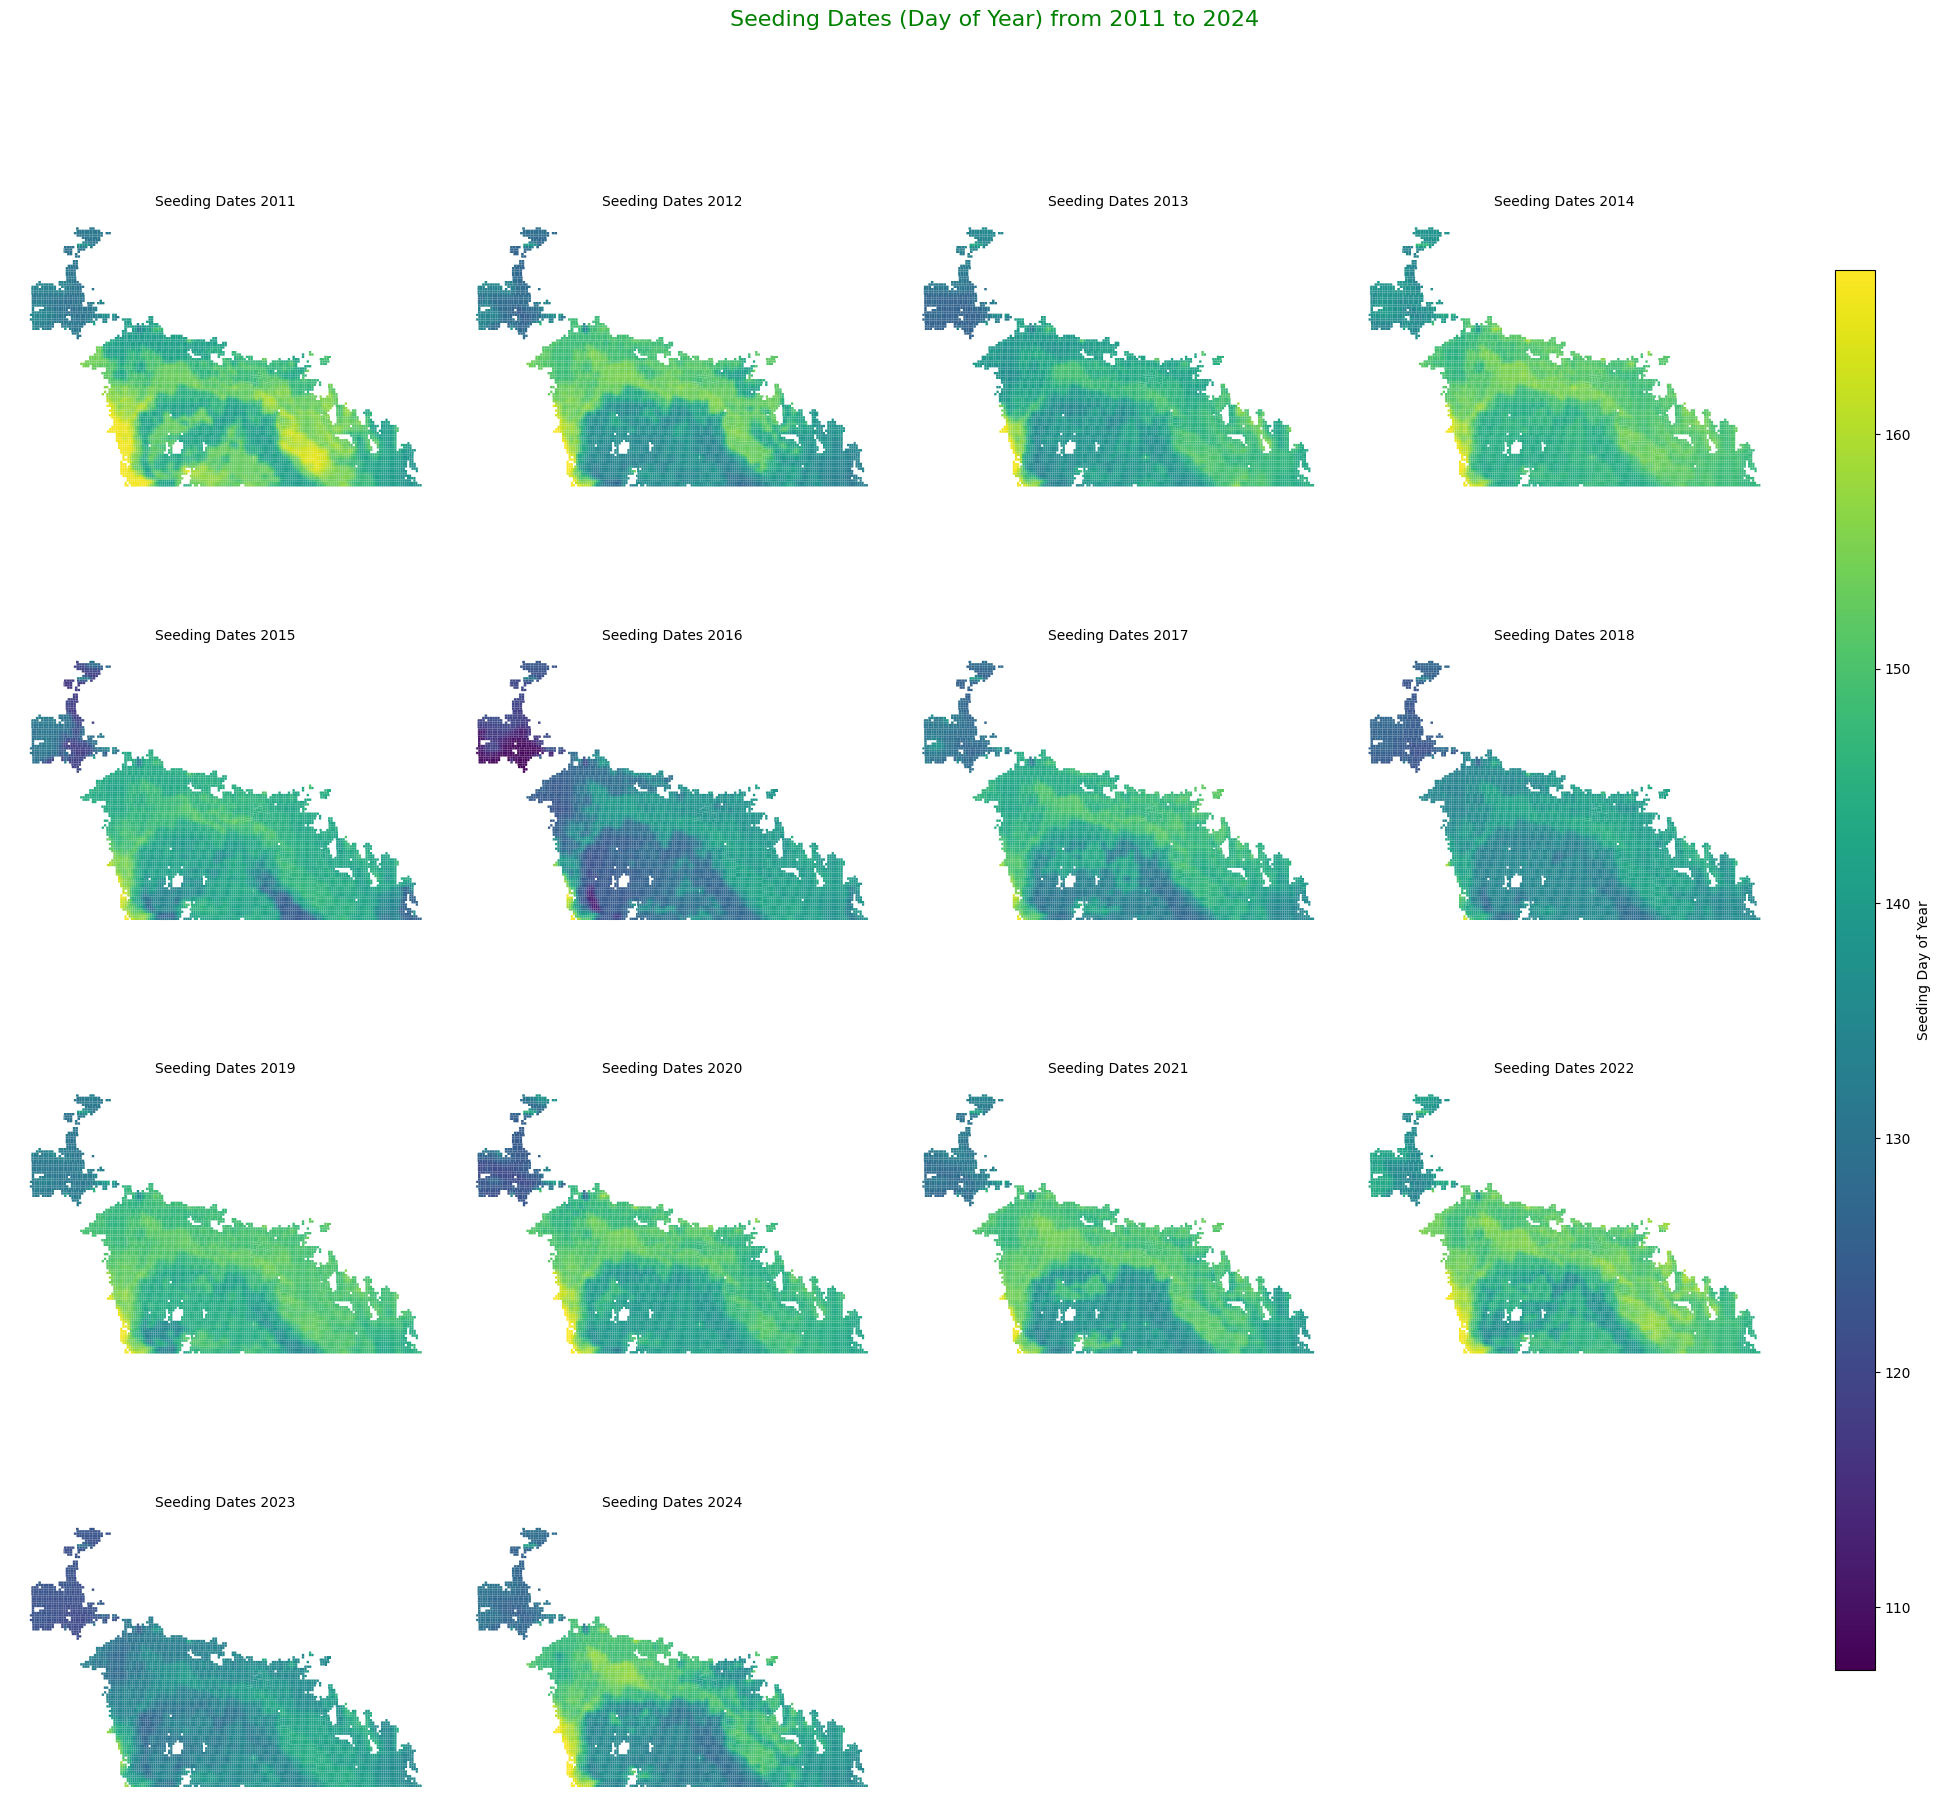

In [67]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Filter data for the years 2011 to 2024
years = list(range(2011, 2025))
df_filtered = df_seeding_dates_canola_2011_2024[df_seeding_dates_canola_2011_2024['Year'].isin(years)]

# Number of rows and columns for subplots
n_rows = 4
n_cols = 4

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))
fig.suptitle('Seeding Dates (Day of Year) from 2011 to 2024', color='green', size=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the colormap and normalization for the shared legend
cmap = 'viridis'
norm = Normalize(vmin=df_filtered['Avg_Seeding_DOY_20km'].min(), vmax=df_filtered['Avg_Seeding_DOY_20km'].max())

# Loop through years and plot each on a separate subplot
for idx, year in enumerate(years):
    ax = axes[idx]
    df_year = df_filtered[df_filtered['Year'] == year]
    df_year.plot(column='Avg_Seeding_DOY_20km', cmap=cmap, norm=norm, legend=False, ax=ax)
    ax.set_title(f'Seeding Dates {year}', fontsize=10)
    ax.axis('off')  # Turn off axis

# Remove any unused subplots
for idx in range(len(years), len(axes)):
    fig.delaxes(axes[idx])

# Add a colorbar for the entire figure
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust these values to position the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Empty array for the scalar mappable
fig.colorbar(sm, cax=cax, label='Seeding Day of Year')

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])
plt.show()


### Find the MAE of the 10 locations with actual seeding dates on 2024 

In [68]:
df_10_actual_test.head()

,Township,Seeding_date_numeric,Date
0,1-27-W1,143.0,2024-05-22
1,1-28-W1,143.0,2024-05-22
2,26-1-W4,136.0,2024-05-15
3,14-22-W2,137.0,2024-05-16
4,73-20-W5,124.0,2024-05-03


In [69]:
df_seeding_dates_canola_2011_2024.dtypes

Township                  object
PR                        object
geometry                geometry
Avg_Seeding_DOY_20km     float64
Year                       int32
dtype: object

In [70]:
df_10_actual_test.dtypes

Township                 object
Seeding_date_numeric    float64
Date                     object
dtype: object

In [71]:
df_10_actual_test['Date'] = pd.to_datetime(df_10_actual_test['Date'])
df_10_actual_test['Year'] = df_10_actual_test['Date'].dt.year

In [72]:
#Merge the two dataframes based 
df_MAE_10_locations = pd.merge(df_10_actual_test,df_seeding_dates_canola_2011_2024, on =['Township','Year'])
df_MAE_10_locations

,Township,Seeding_date_numeric,Date,Year,PR,geometry,Avg_Seeding_DOY_20km
0,1-27-W1,143.0,2024-05-22,2024,MB,"POLYGON ((-101.09343 48.99958, -101.09339 49.0...",138.75
1,1-28-W1,143.0,2024-05-22,2024,MB,"POLYGON ((-101.22787 49.08803, -101.19425 49.0...",138.25
2,26-1-W4,136.0,2024-05-15,2024,AB,"POLYGON ((-110.14460 51.18312, -110.14460 51.1...",136.00
3,14-22-W2,137.0,2024-05-16,2024,SK,"POLYGON ((-105.00961 50.22183, -105.00933 50.2...",128.20
4,73-20-W5,124.0,2024-05-03,2024,AB,"POLYGON ((-117.07843 55.28724, -117.07843 55.2...",125.60
5,82-22-W5,127.0,2024-05-06,2024,AB,"POLYGON ((-117.44656 56.07240, -117.44656 56.0...",126.80
6,50-15-W3,150.0,2024-05-29,2024,SK,"POLYGON ((-108.19872 53.29256, -108.19871 53.2...",149.60
7,43-25-W2,139.0,2024-05-18,2024,SK,"POLYGON ((-105.63193 52.73303, -105.63191 52.7...",143.40
8,54-23-W4,142.0,2024-05-20,2024,AB,"POLYGON ((-113.39372 53.62855, -113.39372 53.6...",149.60
9,11-11-W2,134.0,2024-05-13,2024,SK,"POLYGON ((-103.50793 49.93075, -103.50792 49.9...",134.40


In [73]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
# Calculate MAE between Seeding_DOY and Seeding_date_numeric
mae_value = mean_absolute_error(df_MAE_10_locations["Avg_Seeding_DOY_20km"], df_MAE_10_locations["Seeding_date_numeric"])
mae_value

3.240000000000002

In [74]:
df_seeding_dates_canola_2011_2024

,Township,PR,geometry,Avg_Seeding_DOY_20km,Year
0,1-1-E1,MB,"POLYGON ((-97.45994 49.08858, -97.42614 49.088...",140.000000,2011
1,1-1-E1,MB,"POLYGON ((-97.45994 49.08858, -97.42614 49.088...",133.000000,2012
2,1-1-E1,MB,"POLYGON ((-97.45994 49.08858, -97.42614 49.088...",144.000000,2013
3,1-1-E1,MB,"POLYGON ((-97.45994 49.08858, -97.42614 49.088...",147.250000,2014
4,1-1-E1,MB,"POLYGON ((-97.45994 49.08858, -97.42614 49.088...",130.000000,2015
...,...,...,...,...,...
105233,S-L-WS,SK,"POLYGON ((-106.13778 52.76518, -106.13778 52.7...",150.714286,2020
105234,S-L-WS,SK,"POLYGON ((-106.13778 52.76518, -106.13778 52.7...",150.428571,2021
105235,S-L-WS,SK,"POLYGON ((-106.13778 52.76518, -106.13778 52.7...",152.428571,2022
105236,S-L-WS,SK,"POLYGON ((-106.13778 52.76518, -106.13778 52.7...",140.000000,2023


In [75]:
df_seeding_dates_canola_2011_2024 = df_seeding_dates_canola_2011_2024

In [76]:
df_climate_2011_2024

,Township,Date,GDD,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,SoilType,Year,Cumulative_GDD
0,1-1-E1,2011-04-01,0.0,-1.128510,-0.378265,-0.921661,-1.400726,-1.319916,-1.363129,Moist Black,2011,0.000000
1,1-1-E1,2011-04-02,0.0,-0.723480,1.563629,-0.227844,-1.312836,-1.186127,-1.256714,Moist Black,2011,0.000000
2,1-1-E1,2011-04-03,0.0,0.279449,1.680328,0.521240,-1.174652,-1.015717,-1.087891,Moist Black,2011,0.000000
3,1-1-E1,2011-04-04,0.0,-0.317963,0.535065,0.037964,-1.009857,-0.903656,-0.955689,Moist Black,2011,0.000000
4,1-1-E1,2011-04-05,0.0,-0.296234,3.323883,0.354919,-0.896576,-0.778168,-0.847778,Moist Black,2011,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
22520927,S-L-WS,2024-10-27,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
22520928,S-L-WS,2024-10-28,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
22520929,S-L-WS,2024-10-29,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
22520930,S-L-WS,2024-10-30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439


In [77]:
crop_soil_dict

{'Black, Gray, Dark Gray, Moist Dark Brown, Moist Black': {'Canola': {'Seeding_to_Flowering': 46,
   'Flowering_to_Filling': 25,
   'Filling_to_Maturity': 29,
   'Total_Days': 100},
  'Wheat, Spring': {'Seeding_to_Flowering': 44,
   'Flowering_to_Filling': 26,
   'Filling_to_Maturity': 30,
   'Total_Days': 100},
  'Wheat, Durum': {'Seeding_to_Flowering': 44,
   'Flowering_to_Filling': 26,
   'Filling_to_Maturity': 30,
   'Total_Days': 100},
  'Lentils, Green': {'Seeding_to_Flowering': 38,
   'Flowering_to_Filling': 24,
   'Filling_to_Maturity': 32,
   'Total_Days': 90},
  'Lentils, Red': {'Seeding_to_Flowering': 38,
   'Flowering_to_Filling': 24,
   'Filling_to_Maturity': 32,
   'Total_Days': 90},
  'Oats': {'Seeding_to_Flowering': 40,
   'Flowering_to_Filling': 32,
   'Filling_to_Maturity': 38,
   'Total_Days': 110},
  'Barley': {'Seeding_to_Flowering': 42,
   'Flowering_to_Filling': 24,
   'Filling_to_Maturity': 24,
   'Total_Days': 90},
  'Peas': {'Seeding_to_Flowering': 42,
   'Flo

In [78]:
import pandas as pd


# Flatten into a table
records = []
for soil_group, crops in crop_soil_dict.items():
    for soil in [s.strip() for s in soil_group.split(',')]:
        for crop, stages in crops.items():
            rec = {'SoilType': soil, 'Crop': crop}
            rec.update(stages)
            records.append(rec)

df_growth_table = pd.DataFrame(records)



# Optional: save to CSV
df_growth_table.to_csv("/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/input/crop_growth_stages_by_soil.csv", index=False)


In [79]:
df_growth_table

,SoilType,Crop,Seeding_to_Flowering,Flowering_to_Filling,Filling_to_Maturity,Total_Days
0,Black,Canola,46,25,29,100
1,Black,"Wheat, Spring",44,26,30,100
2,Black,"Wheat, Durum",44,26,30,100
3,Black,"Lentils, Green",38,24,32,90
4,Black,"Lentils, Red",38,24,32,90
5,Black,Oats,40,32,38,110
6,Black,Barley,42,24,24,90
7,Black,Peas,42,24,24,90
8,Gray,Canola,46,25,29,100
9,Gray,"Wheat, Spring",44,26,30,100


In [80]:
import pandas as pd

# Ensure datetime format and year
df_climate_2011_2024['Date'] = pd.to_datetime(df_climate_2011_2024['Date'])
df_climate_2011_2024['Year'] = df_climate_2011_2024['Date'].dt.year

# Prepare seeding date
df_seeding_dates_canola_2011_2024['Seeding_Date'] = pd.to_datetime(
    df_seeding_dates_canola_2011_2024['Year'].astype(str), format='%Y'
) + pd.to_timedelta(df_seeding_dates_canola_2011_2024['Avg_Seeding_DOY_20km'], unit='D')

# Get unique Township-Year-SoilType
df_meta = df_climate_2011_2024[['Township', 'Year', 'SoilType']].drop_duplicates()

# Merge SoilType into seeding date table
df_seeding = df_seeding_dates_canola_2011_2024.merge(df_meta, on=['Township', 'Year'], how='left')

# Flatten crop_soil_dict into a DataFrame
records = []
for soil_group, crops in crop_soil_dict.items():
    for soil in [s.strip() for s in soil_group.split(',')]:
        for crop, stages in crops.items():
            rec = {'SoilType': soil, 'Crop': crop}
            rec.update(stages)
            records.append(rec)
df_cycles = pd.DataFrame(records)

# Initialize result container
crop_results = {}

# Loop by crop type
for crop_type in df_cycles['Crop'].unique():
    df_crop_info = df_cycles[df_cycles['Crop'] == crop_type]

    # Merge soil-specific crop durations into seeding table
    df_crop = df_seeding.merge(df_crop_info, on='SoilType', how='inner')

    # Compute stages
    df_crop['Flowering_Date'] = df_crop['Seeding_Date'] + pd.to_timedelta(df_crop['Seeding_to_Flowering'], unit='D')
    df_crop['Filling_Date'] = df_crop['Flowering_Date'] + pd.to_timedelta(df_crop['Flowering_to_Filling'], unit='D')
    df_crop['Harvest_Date'] = df_crop['Filling_Date'] + pd.to_timedelta(df_crop['Filling_to_Maturity'], unit='D')

    # Add numeric DOY columns
    for stage in ['Seeding', 'Flowering', 'Filling', 'Harvest']:
        df_crop[f'{stage}_DOY'] = df_crop[f'{stage}_Date'].apply(
            lambda d: (d - pd.Timestamp(d.year, 1, 1)).days if pd.notnull(d) else None
        )

    # Convert datetime columns to date-only
    for col in ['Seeding_Date', 'Flowering_Date', 'Filling_Date', 'Harvest_Date']:
        df_crop[col] = df_crop[col].dt.date    

    # Select relevant columns
    results = df_crop[[
        'Township', 'Year', 'PR', 'SoilType', 'Crop',
        'Seeding_Date', 'Flowering_Date', 'Filling_Date', 'Harvest_Date',
        'Seeding_DOY', 'Flowering_DOY', 'Filling_DOY', 'Harvest_DOY'
    ]].copy()

    # Save result
    key = f"{crop_type}"
    if key in crop_results:
        crop_results[key] = pd.concat([crop_results[key], results], ignore_index=True)
    else:
        crop_results[key] = results


In [81]:
""" import os
# Define the directory to save CSV files
output_dir = '/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/outputs/seeding_dates/V_4.0'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist
# === Save each crop's results to individual CSV files ===
for crop, df in crop_results.items():
    # Clean crop name to use in filenames
    safe_crop_name = crop.replace(',', '').replace(' ', '_')
    filename = f"{safe_crop_name}_stage_dates.csv"
    filepath = os.path.join(output_dir, filename)
    df.to_csv(filepath, index=False)
    print(f"Saved: {filename}") """


' import os\n# Define the directory to save CSV files\noutput_dir = \'/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/outputs/seeding_dates/V_4.0\'\nos.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn\'t exist\n# === Save each crop\'s results to individual CSV files ===\nfor crop, df in crop_results.items():\n    # Clean crop name to use in filenames\n    safe_crop_name = crop.replace(\',\', \'\').replace(\' \', \'_\')\n    filename = f"{safe_crop_name}_stage_dates.csv"\n    filepath = os.path.join(output_dir, filename)\n    df.to_csv(filepath, index=False)\n    print(f"Saved: {filename}") '

In [82]:
""" import os

# Define the directory to save CSV files
output_dir = '/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/outputs/seeding_dates/V_4.0'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Iterate over each crop type and its DataFrame
for crop_type, df in crop_results.items():
    # Construct the filename using the crop type
    filename = f"{crop_type.replace(' ', '_')}_crop_calendar.csv"
    filepath = os.path.join(output_dir, filename)
    
    # Save the DataFrame to a CSV file
    df.to_csv(filepath, index=False)

    print(f"Saved {crop_type} data to {filepath}") """

' import os\n\n# Define the directory to save CSV files\noutput_dir = \'/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/outputs/seeding_dates/V_4.0\'\nos.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn\'t exist\n\n# Iterate over each crop type and its DataFrame\nfor crop_type, df in crop_results.items():\n    # Construct the filename using the crop type\n    filename = f"{crop_type.replace(\' \', \'_\')}_crop_calendar.csv"\n    filepath = os.path.join(output_dir, filename)\n    \n    # Save the DataFrame to a CSV file\n    df.to_csv(filepath, index=False)\n\n    print(f"Saved {crop_type} data to {filepath}") '

In [83]:
7517 * 8

60136

### Save yearwise

In [84]:
7517 * 8 * 14

841904

In [85]:
""" import os
output_dir = '/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/outputs/seeding_dates/V_4.0_new'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# === Combine all crops into one DataFrame ===
all_crops_df = pd.concat(crop_results.values(), ignore_index=True)

# === Save results year by year ===
for year, df_year in all_crops_df.groupby('Year'):
    filename = f"crop_stage_dates_{year}.csv"
    filepath = os.path.join(output_dir, filename)
    
    df_year.to_csv(filepath, index=False)
    print(f"Saved: {filename}")
 """

' import os\noutput_dir = \'/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/outputs/seeding_dates/V_4.0_new\'\nos.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn\'t exist\n\n# === Combine all crops into one DataFrame ===\nall_crops_df = pd.concat(crop_results.values(), ignore_index=True)\n\n# === Save results year by year ===\nfor year, df_year in all_crops_df.groupby(\'Year\'):\n    filename = f"crop_stage_dates_{year}.csv"\n    filepath = os.path.join(output_dir, filename)\n    \n    df_year.to_csv(filepath, index=False)\n    print(f"Saved: {filename}")\n '

#### Save yearwise and crop wise

In [86]:
""" import os
output_dir = '/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/outputs/seeding_dates/V_4.0_yearcrop'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# === Combine all crops into one DataFrame ===
all_crops_df = pd.concat(crop_results.values(), ignore_index=True)

# === Save results crop-wise per year ===
for (year, crop), df_subset in all_crops_df.groupby(['Year', 'Crop']):
    # Clean the crop name for safe file naming
    safe_crop_name = crop.replace(',', '').replace(' ', '_')
    
    filename = f"{safe_crop_name}_stage_dates_{year}.csv"
    filepath = os.path.join(output_dir, filename)
    
    df_subset.to_csv(filepath, index=False)
    
    print(f"Saved: {filename}")
 """

' import os\noutput_dir = \'/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/outputs/seeding_dates/V_4.0_yearcrop\'\nos.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn\'t exist\n\n# === Combine all crops into one DataFrame ===\nall_crops_df = pd.concat(crop_results.values(), ignore_index=True)\n\n# === Save results crop-wise per year ===\nfor (year, crop), df_subset in all_crops_df.groupby([\'Year\', \'Crop\']):\n    # Clean the crop name for safe file naming\n    safe_crop_name = crop.replace(\',\', \'\').replace(\' \', \'_\')\n    \n    filename = f"{safe_crop_name}_stage_dates_{year}.csv"\n    filepath = os.path.join(output_dir, filename)\n    \n    df_subset.to_csv(filepath, index=False)\n    \n    print(f"Saved: {filename}")\n '

In [87]:
crop_results

{'Canola':        Township  Year  PR     SoilType    Crop Seeding_Date Flowering_Date  \
 0        1-1-E1  2011  MB  Moist Black  Canola   2011-05-21     2011-07-06   
 1        1-1-E1  2012  MB  Moist Black  Canola   2012-05-13     2012-06-28   
 2        1-1-E1  2013  MB  Moist Black  Canola   2013-05-25     2013-07-10   
 3        1-1-E1  2014  MB  Moist Black  Canola   2014-05-28     2014-07-13   
 4        1-1-E1  2015  MB  Moist Black  Canola   2015-05-11     2015-06-26   
 ...         ...   ...  ..          ...     ...          ...            ...   
 105233   S-L-WS  2020  SK        Black  Canola   2020-05-30     2020-07-15   
 105234   S-L-WS  2021  SK        Black  Canola   2021-05-31     2021-07-16   
 105235   S-L-WS  2022  SK        Black  Canola   2022-06-02     2022-07-18   
 105236   S-L-WS  2023  SK        Black  Canola   2023-05-21     2023-07-06   
 105237   S-L-WS  2024  SK        Black  Canola   2024-05-27     2024-07-12   
 
        Filling_Date Harvest_Date  Seedi

In [88]:
import os
import pandas as pd

output_dir = '/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/outputs/seeding_dates/V_4.0_final'
os.makedirs(output_dir, exist_ok=True)  # Ensure directory exists

# === Combine all crops into one DataFrame ===
all_crops_df = pd.concat(crop_results.values(), ignore_index=True)



# === Save all results to a single master file ===
master_csv_path = os.path.join(output_dir, 'all_crop_stage_dates.csv')
all_crops_df.to_csv(master_csv_path, index=False)
print(f"Saved master CSV: {master_csv_path}")


Saved master CSV: /Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/outputs/seeding_dates/V_4.0_final/all_crop_stage_dates.csv


In [89]:
all_crops_df

,Township,Year,PR,SoilType,Crop,Seeding_Date,Flowering_Date,Filling_Date,Harvest_Date,Seeding_DOY,Flowering_DOY,Filling_DOY,Harvest_DOY
0,1-1-E1,2011,MB,Moist Black,Canola,2011-05-21,2011-07-06,2011-07-31,2011-08-29,140,186,211,240
1,1-1-E1,2012,MB,Moist Black,Canola,2012-05-13,2012-06-28,2012-07-23,2012-08-21,133,179,204,233
2,1-1-E1,2013,MB,Moist Black,Canola,2013-05-25,2013-07-10,2013-08-04,2013-09-02,144,190,215,244
3,1-1-E1,2014,MB,Moist Black,Canola,2014-05-28,2014-07-13,2014-08-07,2014-09-05,147,193,218,247
4,1-1-E1,2015,MB,Moist Black,Canola,2015-05-11,2015-06-26,2015-07-21,2015-08-19,130,176,201,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
841899,S-L-WS,2020,SK,Black,Peas,2020-05-30,2020-07-11,2020-08-04,2020-08-28,150,192,216,240
841900,S-L-WS,2021,SK,Black,Peas,2021-05-31,2021-07-12,2021-08-05,2021-08-29,150,192,216,240
841901,S-L-WS,2022,SK,Black,Peas,2022-06-02,2022-07-14,2022-08-07,2022-08-31,152,194,218,242
841902,S-L-WS,2023,SK,Black,Peas,2023-05-21,2023-07-02,2023-07-26,2023-08-19,140,182,206,230


#### Check whether Seeding date of the year is between the range April 20 th to June 5th

In [90]:
all_crops_df[(all_crops_df['Seeding_DOY']<109 ) & (all_crops_df['Seeding_DOY']<155)]

,Township,Year,PR,SoilType,Crop,Seeding_Date,Flowering_Date,Filling_Date,Harvest_Date,Seeding_DOY,Flowering_DOY,Filling_DOY,Harvest_DOY
97543,72-15-W5,2016,AB,Dark Gray,Canola,2016-04-18,2016-06-03,2016-06-28,2016-07-27,108,154,179,208
97837,73-16-W5,2016,AB,Dark Gray,Canola,2016-04-18,2016-06-03,2016-06-28,2016-07-27,108,154,179,208
98103,72-17-W5,2016,AB,Dark Gray,Canola,2016-04-18,2016-06-03,2016-06-28,2016-07-27,108,154,179,208
98355,71-18-W5,2016,AB,Dark Gray,Canola,2016-04-18,2016-06-03,2016-06-28,2016-07-27,108,154,179,208
98663,71-19-W5,2016,AB,Dark Gray,Canola,2016-04-18,2016-06-03,2016-06-28,2016-07-27,108,154,179,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839753,69-6-W6,2016,AB,Dark Gray,Peas,2016-04-18,2016-05-30,2016-06-23,2016-07-17,108,150,174,198
840019,68-7-W6,2016,AB,Dark Gray,Peas,2016-04-18,2016-05-30,2016-06-23,2016-07-17,108,150,174,198
840033,69-7-W6,2016,AB,Dark Gray,Peas,2016-04-18,2016-05-30,2016-06-23,2016-07-17,108,150,174,198
840299,68-8-W6,2016,AB,Dark Gray,Peas,2016-04-18,2016-05-30,2016-06-23,2016-07-17,108,150,174,198


In [91]:
all_crops_df.columns

Index(['Township', 'Year', 'PR', 'SoilType', 'Crop', 'Seeding_Date',
       'Flowering_Date', 'Filling_Date', 'Harvest_Date', 'Seeding_DOY',
       'Flowering_DOY', 'Filling_DOY', 'Harvest_DOY'],
      dtype='object')

In [92]:
all_crops_df_dates = all_crops_df[['Township', 'Year', 'PR', 'SoilType', 'Crop', 'Seeding_Date',
       'Flowering_Date', 'Filling_Date', 'Harvest_Date']]

In [93]:
all_crops_df_dates.to_csv('/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/outputs/seeding_dates/V_4.0_final/all_crop_stage_dates_based_soiltype_township.csv',index = False)

#### Display flowering dates

/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_1815/3342193453.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])


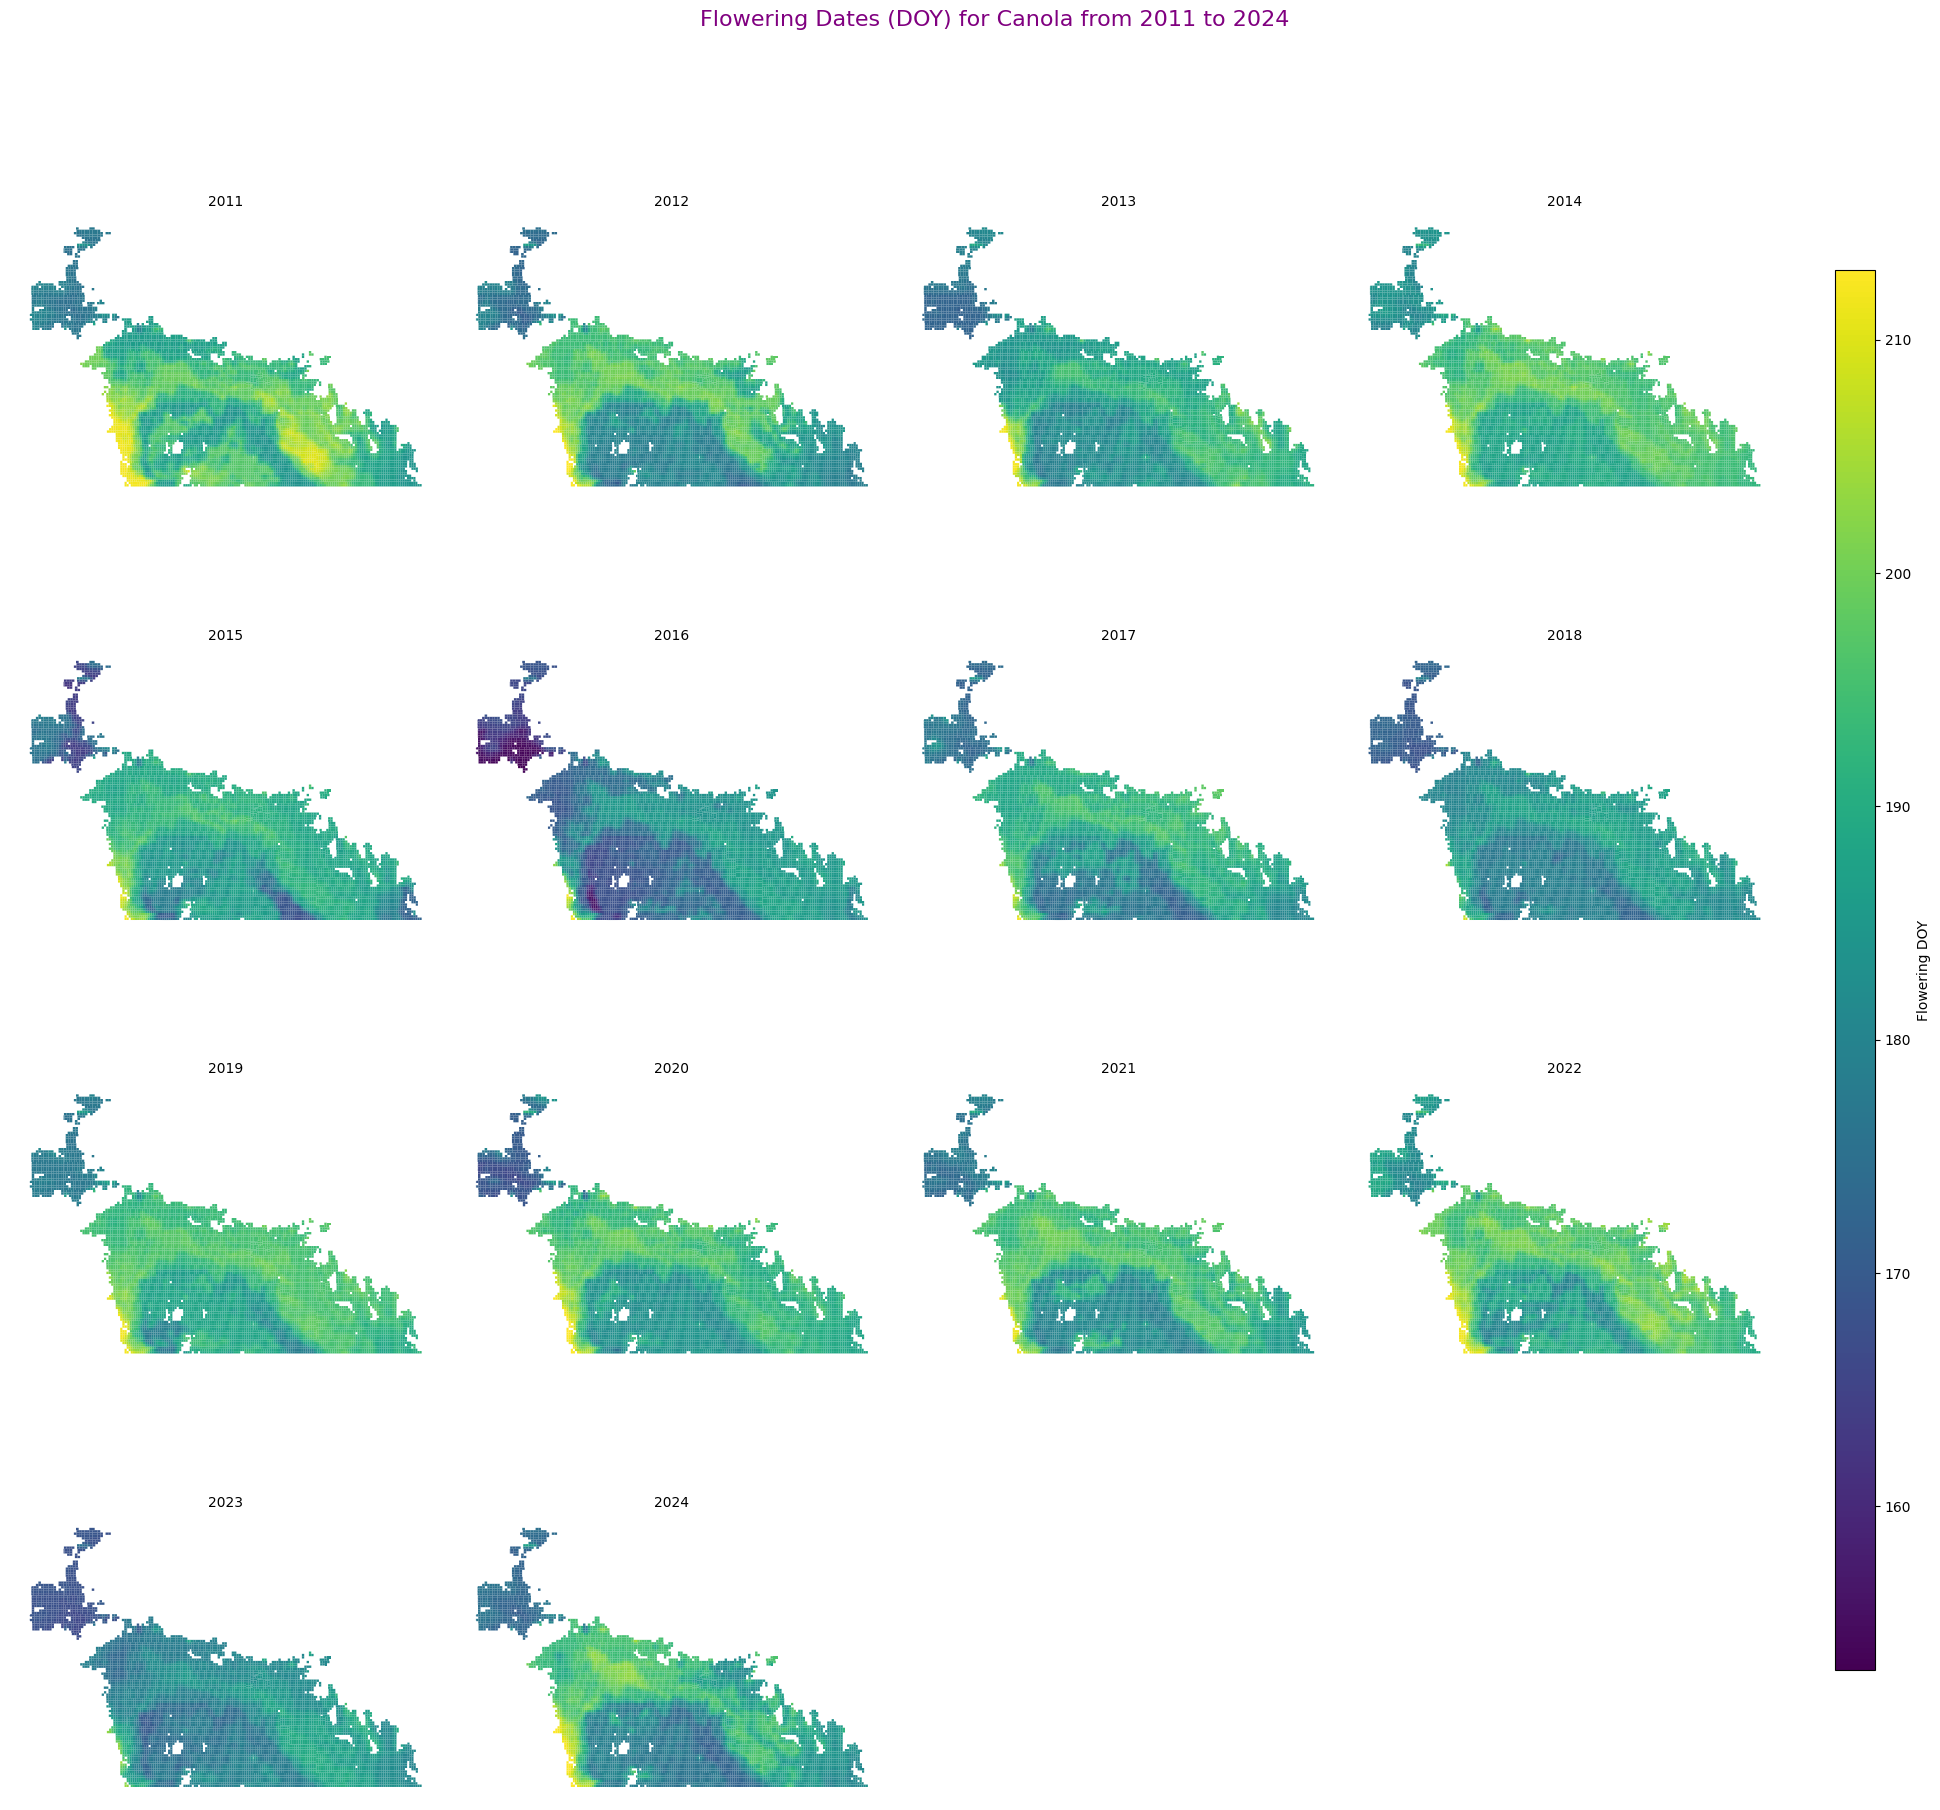

In [94]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Example crop list to map
crops_to_map = ['Canola']  # Adjust as needed

# Filter year range
years = list(range(2011, 2025))
n_rows, n_cols = 4, 4  # for 16 years

for crop in crops_to_map:
    df_crop = crop_results[crop].copy()

    # Convert Flowering_Date to DOY
    df_crop['Flowering_DOY'] = pd.to_datetime(df_crop['Flowering_Date']).apply(
        lambda d: (d - pd.Timestamp(d.year, 1, 1)).days if pd.notnull(d) else None
    )

    # Filter valid years and create GeoDataFrame
    df_filtered = df_crop[df_crop['Year'].isin(years)]
    df_filtered =  pd.merge(df_filtered,gdf_twn,on=['Township'])
    gdf_filtered = gpd.GeoDataFrame(df_filtered, geometry='geometry', crs='EPSG:4326')

    # Set up plotting
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))
    fig.suptitle(f'Flowering Dates (DOY) for {crop} from 2011 to 2024', color='purple', size=16)
    axes = axes.flatten()

    # Normalize color scale across all years
    norm = Normalize(vmin=gdf_filtered['Flowering_DOY'].min(), vmax=gdf_filtered['Flowering_DOY'].max())
    cmap = 'viridis'

    for idx, year in enumerate(years):
        ax = axes[idx]
        gdf_year = gdf_filtered[gdf_filtered['Year'] == year]
        gdf_year.plot(column='Flowering_DOY', cmap=cmap, norm=norm, legend=False, ax=ax)
        ax.set_title(f'{year}', fontsize=10)
        ax.axis('off')

    # Remove unused axes
    for idx in range(len(years), len(axes)):
        fig.delaxes(axes[idx])

    # Add shared colorbar
    cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []
    fig.colorbar(sm, cax=cax, label='Flowering DOY')

    plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])
    plt.show()


In [95]:
all_crops_df

,Township,Year,PR,SoilType,Crop,Seeding_Date,Flowering_Date,Filling_Date,Harvest_Date,Seeding_DOY,Flowering_DOY,Filling_DOY,Harvest_DOY
0,1-1-E1,2011,MB,Moist Black,Canola,2011-05-21,2011-07-06,2011-07-31,2011-08-29,140,186,211,240
1,1-1-E1,2012,MB,Moist Black,Canola,2012-05-13,2012-06-28,2012-07-23,2012-08-21,133,179,204,233
2,1-1-E1,2013,MB,Moist Black,Canola,2013-05-25,2013-07-10,2013-08-04,2013-09-02,144,190,215,244
3,1-1-E1,2014,MB,Moist Black,Canola,2014-05-28,2014-07-13,2014-08-07,2014-09-05,147,193,218,247
4,1-1-E1,2015,MB,Moist Black,Canola,2015-05-11,2015-06-26,2015-07-21,2015-08-19,130,176,201,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
841899,S-L-WS,2020,SK,Black,Peas,2020-05-30,2020-07-11,2020-08-04,2020-08-28,150,192,216,240
841900,S-L-WS,2021,SK,Black,Peas,2021-05-31,2021-07-12,2021-08-05,2021-08-29,150,192,216,240
841901,S-L-WS,2022,SK,Black,Peas,2022-06-02,2022-07-14,2022-08-07,2022-08-31,152,194,218,242
841902,S-L-WS,2023,SK,Black,Peas,2023-05-21,2023-07-02,2023-07-26,2023-08-19,140,182,206,230


In [96]:
all_crops_df[all_crops_df['Township']=='34-10-W2'].tail(40)

,Township,Year,PR,SoilType,Crop,Seeding_Date,Flowering_Date,Filling_Date,Harvest_Date,Seeding_DOY,Flowering_DOY,Filling_DOY,Harvest_DOY
551420,34-10-W2,2013,SK,Moist Black,Oats,2013-05-24,2013-07-03,2013-08-04,2013-09-11,143,183,215,253
551421,34-10-W2,2014,SK,Moist Black,Oats,2014-05-30,2014-07-09,2014-08-10,2014-09-17,149,189,221,259
551422,34-10-W2,2015,SK,Moist Black,Oats,2015-05-25,2015-07-04,2015-08-05,2015-09-12,144,184,216,254
551423,34-10-W2,2016,SK,Moist Black,Oats,2016-05-19,2016-06-28,2016-07-30,2016-09-06,139,179,211,249
551424,34-10-W2,2017,SK,Moist Black,Oats,2017-05-27,2017-07-06,2017-08-07,2017-09-14,146,186,218,256
551425,34-10-W2,2018,SK,Moist Black,Oats,2018-05-22,2018-07-01,2018-08-02,2018-09-09,141,181,213,251
551426,34-10-W2,2019,SK,Moist Black,Oats,2019-05-30,2019-07-09,2019-08-10,2019-09-17,149,189,221,259
551427,34-10-W2,2020,SK,Moist Black,Oats,2020-05-25,2020-07-04,2020-08-05,2020-09-12,145,185,217,255
551428,34-10-W2,2021,SK,Moist Black,Oats,2021-05-29,2021-07-08,2021-08-09,2021-09-16,148,188,220,258
551429,34-10-W2,2022,SK,Moist Black,Oats,2022-05-31,2022-07-10,2022-08-11,2022-09-18,150,190,222,260
